### Checking the Kaggle datasets and results

In [2]:
import pandas as pd

name = 'THROMBIN'
df = pd.read_csv(f"data\\{name}_training_disguised.csv")
print(len(df))
len([s for s in df.columns if s.startswith('D')])

5059


5282

In [71]:
thresholds_map = {'NK1': 9.5, 'PGP': 0.5, 'LOGD': 4, '3A4': 4.5, 'CB1': 8.0, 'DPP4': 6.5, 'HIVINT': 7, 'HIVPROT': 9, 'METAB': 70, 'OX1': 7.5, 'OX2': 8, 'PPB': 2, 'RAT_F': 1.7, 'TDI': 1, 'THROMBIN': 7}

len(df[df['Act'] >= thresholds_map[name]]) / len(df)

0.48665744218224943

In [22]:
import os
import pandas as pd

name = 'LOGD'

sample = 0.1
df_ones = []
for j in range(1, 101):
    try: 
        df = pd.read_csv(os.path.join("result", f"{sample:.2f}" ,f"{name} {sample:.2f}", f"{name} {sample:.2f} {j}.csv"))
    except FileNotFoundError as e:
        print(e)
    df = df[df['fdp_nominals'] == 0.2]
    df_ones.append(df)
df = pd.concat(df_ones).mean()[['time_15_rb', 'time_15_rp', 'time_cs']]

df1 = df

sample = 1.0
df_ones = []
for j in range(1, 101):
    try: 
        df = pd.read_csv(os.path.join("result", f"{sample:.2f}" ,f"{name} {sample:.2f}", f"{name} {sample:.2f} {j}.csv"))
    except FileNotFoundError as e:
        print(e)
    df = df[df['fdp_nominals'] == 0.2]
    df_ones.append(df)
df = pd.concat(df_ones).mean()[['time_15_rb', 'time_15_rp', 'time_cs']]

print(df1, df)

[Errno 2] No such file or directory: 'result\\1.00\\LOGD 1.00\\LOGD 1.00 29.csv'
[Errno 2] No such file or directory: 'result\\1.00\\LOGD 1.00\\LOGD 1.00 87.csv'
time_15_rb    357.239220
time_15_rp      5.989078
time_cs         2.822793
dtype: float64 time_15_rb    79632.303887
time_15_rp       70.513639
time_cs          38.974660
dtype: float64


### Public ADMET data test

In [69]:
import pandas as pd

df = pd.read_csv(f"data/public_admet_data_all.csv")
df

,smiles,molecular weight,CL_microsome_human,CL_microsome_mouse,CL_microsome_rat,CL_total_dog,CL_total_human,CL_total_monkey,CL_total_rat,CYP2C8_inhibition,...,Papp_Caco2,Pgp_human,hERG_binding,LogD_pH_7.4,kinetic_logSaq,thermo_logSaq,VDss_dog,VDss_human,VDss_monkey,VDss_rat
0,CCOc1ccc(Nc2c(C)c(N[C@H]3CCCNC3)nc3ccnn23)cc1,366.469,4.000,4.041,NaN,NaN,NaN,NaN,NaN,NaN,...,1.452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N[C@H]1CC[C@H](Nc2cc(Nc3ccc(F)c(Cl)c3)n3nccc3n...,374.851,4.000,4.771,NaN,NaN,NaN,NaN,NaN,NaN,...,0.851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COc1ccccc1C(=O)/C=C/c1ccccc1C(F)(F)F,306.283,5.176,5.839,NaN,NaN,NaN,NaN,NaN,NaN,...,1.241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,COc1cc2ncnc(Nc3c(F)ccc(O)c3C)c2cc1OC,329.331,3.778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cn1ncc2cc(Cc3[nH]nc4ccc(C(=O)N5CC[C@H](O)C5)cc...,375.432,4.000,4.000,4.0,NaN,NaN,NaN,NaN,NaN,...,0.633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114107,CC(=O)Nc1ccc(C2=NNC(=O)C[C@H]2C)cc1,245.282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.377,NaN,NaN
114108,CC(=O)CC(c1ccc([N+](=O)[O-])cc1)c1c(O)c2ccccc2...,353.330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.620,NaN,NaN
114109,CCO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(Sc...,684.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.432,NaN,NaN
114110,COC(=O)c1cnc2n1CCc1ccccc1C2=C1CCN(CCc2ccc(OCc3...,584.720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.780,NaN,NaN


In [70]:
df = df[['smiles', 'Pgp_human']].dropna()
df

,smiles,Pgp_human
24,COc1ccc2c(Oc3ccc(NC(=O)c4c(C)n(CC(C)(C)O)n(-c5...,-0.097
115,Cc1nn(C)c(C)c1NS(=O)(=O)c1c(Cl)cc(-c2ccnc(N3CC...,0.732
151,C=CC(=O)NC1CCN(S(=O)(=O)c2ccc(C(=O)NCCc3ccccc3...,1.643
172,CN[C@@H](C)C(=O)N[C@H](C(=O)N1C[C@H]2CCCN2C[C@...,1.362
177,CCO[C@@H]1C[C@@H]2CN(C(=O)[C@@H](NC(=O)[C@H](C...,1.380
...,...,...
22313,O=C1/C(=C/c2ccc([N+](=O)[O-])cc2)CNC/C1=C\c1cc...,-2.000
22314,CNc1nc(Cc2ccccc2)nc2c1CCNCC2,1.000
22315,C[C@H]1Oc2cc(cnc2N)-c2cc(S(C)(=O)=O)ccc2CN(C)C...,0.964
22316,COc1cccc(Oc2ccc3c(c2)CC(N)c2n[nH]c(=O)n2-3)c1,0.179


In [71]:
threshold = 0
len(df[df['Pgp_human'] < threshold]) / len(df)

0.1548480463096961

In [72]:
from DeepPurpose import utils, CompoundPred
from tdc.utils import create_fold

encodings = ['DGL_AttentiveFP', 'Morgan', 'CNN', 'rdkit_2d_normalized', 'DGL_GCN', 'DGL_NeuralFP', 'DGL_GIN_AttrMasking', 'DGL_GIN_ContextPred']
drug_encoding = encodings[2]

df = utils.data_process(X_drug = df.smiles.values, y = df.Pgp_human.values, 
                            drug_encoding = drug_encoding,
                            split_method='no_split')

Drug Property Prediction Mode...
in total: 2073 drugs
encoding drug...
unique drugs: 2073
do not do train/test split on the data for already splitted data


In [73]:
df_split = create_fold(df, 1, [0.8, 0.1, 0.1])
calib = df_split['valid']
test = df_split['test']
train_val = df_split['train']

df_split = create_fold(train_val, 1, [0.9, 0.1, 0])
train = df_split['train']
val = df_split['valid']

In [74]:
train['Label'] = train['Label'] < threshold
calib['Label'] = calib['Label'] < threshold
val['Label'] = val['Label'] < threshold
test['Label'] = test['Label'] < threshold

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69464. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.60143 , AUPRC: 0.24681 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.62475. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.60740 , AUPRC: 0.25532 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.50335. Total time 0.00027 hours
Validation at Epoch 3 , AUROC: 0.62317 , AUPRC: 0.28411 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.44521. Total time 0.00055 hours
Validation at Epoch 4 , AUROC: 0.64540 , AUPRC: 0.31566 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.53535. Total time 0.00083 hours
Validation at Epoch 5 , AUROC: 0.64874 , AUPRC: 0.33950 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.44386. Total time 0.00083 hours
Validation at Epoch 6 , AUROC: 0.64277 , AUPRC: 0.33558 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.46984. Total time 0.00111 hours
Validation

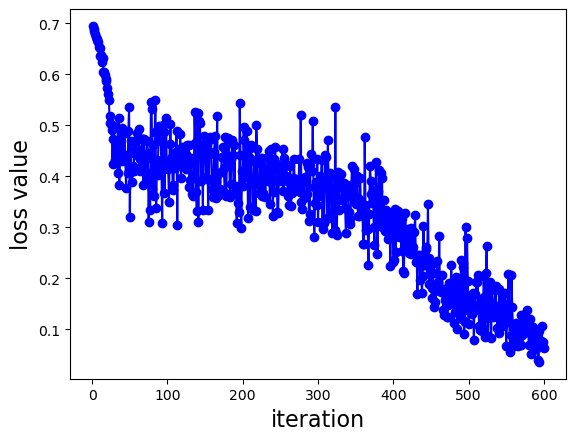

In [75]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                               train_epoch = 50, 
                               batch_size = 128)

model = CompoundPred.model_initialize(**config)
model.train(train, val)    

In [76]:
Ycalib = calib.Label.values
Ytest = test.Label.values

Ycalibpred = model.predict(calib)
Ytestpred = model.predict(test)

predicting...
predicting...


In [77]:
import numpy as np
Ycalibpred = np.array(Ycalibpred)
Ytestpred = np.array(Ytestpred)

In [78]:
'''
Evaluate the selection performace: power and FDP. The region (lower, higher) corresponds to the null hypothesis
'''
def eval(Y, rejected, lower, higher):
    true_reject = np.sum((lower < Y) & (Y < higher))
    if len(rejected) == 0:
        fdp = 0
        power = 0
    else:
        fdp = np.sum((lower >= Y[rejected]) | (Y[rejected] >= higher)) / len(rejected)
        power = np.sum((lower < Y[rejected]) & (Y[rejected] < higher)) / true_reject if true_reject != 0 else 0
    return fdp, power

''' 
Given a list of p-values and nominal FDR level q, apply BH procedure to get a rejection set.
'''
def BH(pvals, q):
    ntest = len(pvals)
         
    df_test = pd.DataFrame({"id": range(ntest), "pval": pvals}).sort_values(by='pval')
    
    df_test['threshold'] = q * np.linspace(1, ntest, num=ntest) / ntest 
    idx_smaller = [j for j in range(ntest) if df_test.iloc[j,1] <= df_test.iloc[j,2]]
    
    if len(idx_smaller) == 0:
        return np.array([])
    else:
        idx_sel = np.array(df_test.index[range(np.max(idx_smaller) + 1)])
        return idx_sel

In [81]:
fdps, powers = [], []
ntest = len(Ytest)

for i, q in enumerate([0.1, 0.2, 0.3, 0.4, 0.5]):
    calib_scores = 1000 * (Ycalib > 0) - Ycalibpred
    test_scores = -Ytestpred
    
    pvals = np.zeros(ntest)
    for j in range(ntest):
        pvals[j] = (np.sum(calib_scores < test_scores[j]) + np.random.uniform(size=1)[0] * (np.sum(calib_scores == test_scores[j]) + 1)) / (len(calib_scores) + 1)
    sel = BH(pvals, q)
    fdp, power = eval(Ytest, sel, 0, np.inf)
    fdps.append(fdp)
    powers.append(power)

fdps, powers

([0, 0.0, 0.26666666666666666, 0.26666666666666666, 0.38095238095238093],
 [0,
  0.03571428571428571,
  0.39285714285714285,
  0.39285714285714285,
  0.4642857142857143])